Importing necessary libraries 

# <div style="text-align: center;"><b><span style='color:#e61227'>|</span> Convolutional Neural Network for Diabetic Retinopathy Detection (Pytorch)<span style='color:#e61227'>|</span></b></div>[[](http://)](http://)

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1. </span></b> Diabetic Retinopathy: A Threat to Vision Health</b></p>
</div>

Diabetic retinopathy, a prevalent complication of diabetes, poses a significant threat to vision health. This condition arises when prolonged exposure to elevated blood sugar levels weakens the delicate blood vessels in the retina, the light-sensitive tissue at the back of the eye. 

Initially, the impact may be subtle, with changes occurring in the retinal blood vessels, particularly the delicate capillaries, leading to potential bleeding and fluid leakage. As the condition progresses, more severe manifestations emerge, such as the growth of abnormal blood vessels on the retina's surface. These vessels can bleed and exert traction on the retina, ultimately jeopardizing vision and potentially leading to blindness if left untreated.
![](https://static.wixstatic.com/media/d9e2f2_bdef7bf6e73342e5a065f474477d7606~mv2.jpg/v1/fill/w_708,h_625,al_c,lg_1,q_85,enc_auto/d9e2f2_bdef7bf6e73342e5a065f474477d7606~mv2.jpg)

## <b>1.1 <span style='color:#e61227'>|</span> Types of Diabetic Retinopathy</b> 


Diabetic retinopathy encompasses two main types:

1. **Non-Proliferative Diabetic Retinopathy:** Characterized by changes in retinal blood vessels and potential bleeding and fluid leakage.
2. **Proliferative Diabetic Retinopathy:** Involves the growth of abnormal blood vessels on the retina's surface, posing a significant risk to vision.

Additionally, diabetic macular edema, characterized by swelling in the macula, can further complicate the condition.


## <b>1.2 <span style='color:#e61227'>|</span> Causes and Risk Factors</b> 

The development and progression of diabetic retinopathy are influenced by various factors, including:

- **Duration of diabetes:** Longer duration of diabetes increases the risk of diabetic retinopathy.
- **Blood sugar control:** Poor blood sugar control exacerbates the condition, while better control can help mitigate its progression.
- **Blood pressure and cholesterol levels:** Uncontrolled high blood pressure and cholesterol levels increase the risk of diabetic retinopathy.
- **Lifestyle factors:** Smoking, in particular, is a major risk factor for diabetic retinopathy, along with race and pregnancy status.

## <b>1.3 <span style='color:#e61227'>|</span> Prevention and Management</b> 

Regular monitoring and management of blood sugar levels, blood pressure, and cholesterol are crucial for individuals with diabetes to mitigate the risk of diabetic retinopathy. Furthermore, timely eye examinations are essential for early detection and intervention, as early-stage diabetic retinopathy may not present noticeable symptoms.

By prioritizing proactive measures and adopting a comprehensive approach to diabetes management, individuals can safeguard their vision and mitigate the potentially devastating effects of diabetic retinopathy.

## <b>1.4 <span style='color:#e61227'>|</span> Why we Use Machine Learning for Such Case?</b> 
Diabetic Retinopathy is a common problem among people who have had diabetes for a long time. It's really important to catch it early and treat it quickly to stop people from losing their vision. But right now, doctors have to look at lots of eye pictures one by one, which takes a long time and sometimes they make mistakes. We need a tool that can help them do this job faster and more accurately. The current ways of finding and grading Diabetic Retinopathy rely on doctors' opinions and take a lot of time and effort. This can cause problems in diagnosing the disease correctly and can slow down getting treatment to people who need it. With more and more people getting diabetes and not enough eye doctors to check everyone, it's even harder to find and treat Diabetic Retinopathy in time. So, we need a new system that uses machines to do this job instead. This system would be fast and reliable, helping doctors find and grade Diabetic Retinopathy quickly and accurately. It would make sure people get the right treatment as soon as possible, which could save their vision.

## <b>1.4 <span style='color:#e61227'>|</span> Data Description</b> 
This dataset comprises numerous high-quality images of the retina captured using different imaging settings. Each image has been evaluated by a medical expert to identify the presence of Diabetic Retinopathy, and a score ranging from 0 to 4 has been assigned accordingly.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import torch
from torch import nn
import torchvision
from torchvision import datasets
import os
from pathlib import Path
import random
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms , datasets
from torch.utils.data.sampler import SubsetRandomSampler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from torch.utils.data import DataLoader
from tqdm.auto import tqdm 
from timeit import default_timer as timer
from torch.autograd import Variable
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Version of Torch and Torchvision

In [2]:
print(f'The version of torch is : {torch.__version__}\nThe version of torchvision is : {torchvision.__version__}')

The version of torch is : 2.0.0
The version of torchvision is : 0.15.1


Looking at computer Hardware and GPU

In [3]:
!nvidia-smi

Sun May 19 14:26:09 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P0              27W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

If we have GPU we turn our device into that

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

creating a function to show details from folder 

In [5]:
def check_diractory(directory_path):
                                 
    for dirpath , dirname , filename in os.walk(directory_path):
        print(f"There are {len(dirname)} directories and {len(filename)} images in '{dirpath}'.")
        


Checking data path and its folders and images

In [6]:
train_dir = "/kaggle/input/diagnosis-of-diabetic-retinopathy/train"
test_dir = "/kaggle/input/diagnosis-of-diabetic-retinopathy/test"
valid_dir = "/kaggle/input/diagnosis-of-diabetic-retinopathy/valid"

Checking Train directories and imges per class

In [7]:
Image_path_Train = Path(train_dir)
check_diractory(Image_path_Train)

There are 2 directories and 0 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/train'.
There are 0 directories and 1050 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/train/DR'.
There are 0 directories and 1026 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/train/No_DR'.


Checking Test directories and imges per class

In [8]:
Image_path_Test = Path(test_dir)
check_diractory(Image_path_Test)

There are 2 directories and 0 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/test'.
There are 0 directories and 113 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/test/DR'.
There are 0 directories and 118 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/test/No_DR'.


In [9]:
Image_path_Test = Path(valid_dir)
check_diractory(Image_path_Test)

There are 2 directories and 0 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/valid'.
There are 0 directories and 245 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/valid/DR'.
There are 0 directories and 286 images in '/kaggle/input/diagnosis-of-diabetic-retinopathy/valid/No_DR'.


Determination of train - test - pred  paths

In [10]:
train_dir , test_dir , valid_dir

('/kaggle/input/diagnosis-of-diabetic-retinopathy/train',
 '/kaggle/input/diagnosis-of-diabetic-retinopathy/test',
 '/kaggle/input/diagnosis-of-diabetic-retinopathy/valid')

Showing a Random Image from Training images

The path   of the random image  is : /kaggle/input/diagnosis-of-diabetic-retinopathy/train/DR/90b8bf342032_png.rf.2887ca8588e727c4d8b2ee4ba985e6af.jpg
The class  of the random image  is : DR
The height of the random image  is : 224
The width  of the random image  is : 224


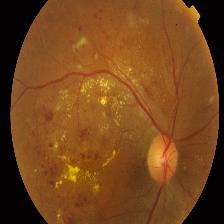

In [11]:
random.seed(42)

list_image_path = list(Path(train_dir).glob('*/*.jpg'))

Random_Image_Path = random.choice(list_image_path)

img = Image.open(Random_Image_Path)

print(f'The path   of the random image  is : {Random_Image_Path}')
print(f'The class  of the random image  is : {Random_Image_Path.parent.stem}')
print(f'The height of the random image  is : {img.height}')
print(f'The width  of the random image  is : {img.width}')
img

<center>
<img src="https://research.aimultiple.com/wp-content/uploads/2021/04/data-augmentation-techniques.png" width=700 height=400 />
</center>

Using of data augmentation to avoid overfitting and fundamental converting  like from image to tensor  (there are various ways for Augmentation images)

In [12]:
train_transforms = transforms.Compose([
    transforms.Resize(size=(150 , 150)) ,
    transforms.ColorJitter(0.4,0.5,0.5,0.2),
    transforms.RandomHorizontalFlip(p=0.5) , 
    transforms.RandomCrop(size=(150,150)),  
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.205, 0.205, 0.205))
])


test_transforms = transforms.Compose([
    transforms.Resize((150, 150)), 
    transforms.ToTensor(),
    transforms.Normalize((0.425, 0.415, 0.405), (0.255, 0.245, 0.235))
])

Randomly showing orginal and transformed images

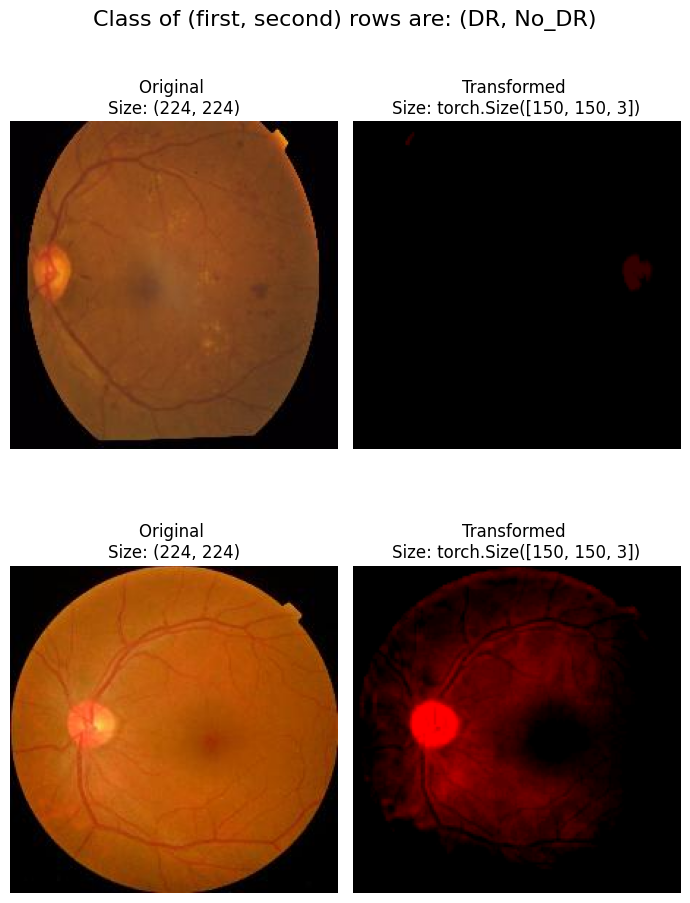

In [13]:
def show_transformed_images(random_images , transform,seed = 42):
    
    random.seed = seed
    classes = []
    fig , axs = plt.subplots(2, 2, figsize=(7, 10))
    for i, path in enumerate(random_images):
        with Image.open(path) as f :
            row = i
            ax = axs[row, 0]
            
            ax.imshow(f) 
            ax.set_title(f"Original \nSize: {f.size}")
            ax.axis("off")

            ax = axs[row, 1]
            transformed_image = transform(f).permute(1, 2, 0) 
            ax.imshow(transformed_image) 
            ax.set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax.axis("off")
            classes.append(path.parent.stem)
    fig.suptitle(f"Class of (first, second) rows are: ({classes[0]}, {classes[1]})", fontsize=16)        
    plt.tight_layout()
    plt.show()
    
list_image_path_train = list(Path(train_dir).glob('*/*.jpg'))

four_random_image_train = random.sample(list_image_path_train , 2)

show_transformed_images(random_images=four_random_image_train , 
                        transform=train_transforms)

ImageFolder is Responsible for loading images from train and test folders and setting transform on images

In [14]:
train_data = datasets.ImageFolder(root=train_dir , transform = train_transforms )
test_data = datasets.ImageFolder(root=test_dir , transform=train_transforms )
valid_data = datasets.ImageFolder(root=valid_dir , transform=train_transforms )

print(f'Train data : {train_data}\n\n\nTest data : {test_data}\n\n\nValid data : {valid_data}')

Train data : Dataset ImageFolder
    Number of datapoints: 2076
    Root location: /kaggle/input/diagnosis-of-diabetic-retinopathy/train
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=warn)
               ColorJitter(brightness=(0.6, 1.4), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=(-0.2, 0.2))
               RandomHorizontalFlip(p=0.5)
               RandomCrop(size=(150, 150), padding=None)
               ToTensor()
               Normalize(mean=(0.425, 0.415, 0.405), std=(0.205, 0.205, 0.205))
           )


Test data : Dataset ImageFolder
    Number of datapoints: 231
    Root location: /kaggle/input/diagnosis-of-diabetic-retinopathy/test
    StandardTransform
Transform: Compose(
               Resize(size=(150, 150), interpolation=bilinear, max_size=None, antialias=warn)
               ColorJitter(brightness=(0.6, 1.4), contrast=(0.5, 1.5), saturation=(0.5, 1.5), hue=(-0.2, 0.2))
              

Craeting a function to show classes and convert them into indexes for each

In [15]:
def class_finder(directory):
    classes = sorted(i.name for i in os.scandir(directory) if i.is_dir())
    if not classes:
        raise FileNotFound(f'This directory dose not have any classes : {directory}')
    class_to_inx = {name : value for name , value in enumerate(classes) }
    
    return  classes , class_to_inx



We create a class to show classes , indexes , length , showing image of dataset and etc

In [16]:
class ImageFolderCustom(Dataset):
    
    
    def __init__(self , target_dir , transform ):
        
        self.paths = list(Path(target_dir).glob('*/*.jpg'))
        
        self.transform = transform
        
        self.classes , self.classes_to_inx = class_finder(target_dir)
    
    def load_image(self, index):
        
        image_path = self.paths[index]
        
        return Image.open(image_path)
    
    
    def __len__(self):
        
        return len(self.paths)
    
    
    
    def __getitem__(self , indx):
        
        img = self.load_image(indx)
        
        class_name = self.paths[indx].parent.name
        
        class_inx = self.class_to_idx[class_name]
        
        if self.transform:
            return self.transform(img), class_idx 
        else:
            return img, class_idx 
        
        

Using ImageFolderCustom to convert Train and Test

In [17]:
train_data_custom = ImageFolderCustom(target_dir=train_dir, 
                                      transform=train_transforms)
test_data_custom = ImageFolderCustom(target_dir= test_dir, 
                                     transform=test_transforms)
valid_data_custom = ImageFolderCustom(target_dir= valid_dir, 
                                     transform=train_transforms)
train_data_custom, test_data_custom, valid_data_custom

(<__main__.ImageFolderCustom at 0x7c264e895000>,
 <__main__.ImageFolderCustom at 0x7c264e894820>)

In [18]:
print(f'The len of train data is : {len(train_data_custom)}\nThe len of test  data is : {len(test_data_custom)}\nThe len of test  data is : {len(valid_data_custom)}')

The len of train data is : 2076
The len of test  data is : 231
The len of test  data is : 531


Showing a random image

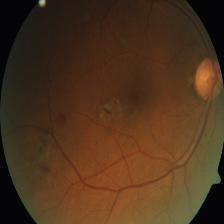

In [19]:
train_data_custom.load_image(100)

showing the number of classes and their names

In [20]:
print(f'The number of classes are : {len(train_data_custom.classes)}')
train_data_custom.classes


The number of classes are : 2


['DR', 'No_DR']

We infer each class to an index 

In [21]:
train_data_custom.classes_to_inx

{0: 'DR', 1: 'No_DR'}

seting 10 percent of Training data as validation (we use shuffle to make both Train and Validation randomly)

In [22]:
# size_valid = 0.10

# number_train = len(train_data_custom)
# indx = list(range(number_train))

# np.random.shuffle(indx)
# split = int(size_valid * number_train)

# train_idx, valid_idx = indx[split:], indx[:split]

# train_sampler = SubsetRandomSampler(train_idx)
# valid_sampler = SubsetRandomSampler(valid_idx)

Dataloader is used to make our data iterable for our model(we can set batch-size based on our computer power)

In [23]:
train_dataloader = DataLoader(dataset= train_data , 
                              batch_size= 32 ,  
                              num_workers=0,
                              shuffle = True
#                               sampler=train_sampler  
                              )
                             
valid_dataloader = DataLoader(dataset=valid_data , 
                             batch_size=32 , 
                             num_workers=0,
                             shuffle = True
#                              sampler=valid_sampler                            
                             )

test_dataloader = DataLoader(dataset=test_data,
                            batch_size=32,
                            num_workers=0,
                            shuffle=False)

shape and size of a batch of train_dataloader

In [24]:
img , label = next(iter(train_dataloader))
# img
print(f'The shape is : {img.shape} [batch-size , color-channels , height , width]')
print(f'The label shape is : {label.shape}')

The shape is : torch.Size([32, 3, 150, 150]) [batch-size , color-channels , height , width]
The label shape is : torch.Size([32])


Using Pretraind Resnet50 and fication its gradient and changing last layer(from1000 classes into 6)

In [25]:
Model = torchvision.models.wide_resnet50_2(pretrained=True)

for param in Model.parameters():
    param.required_grad = False
    
number_feature = Model.fc.in_features
Model.fc = nn.Linear(in_features=number_feature , out_features=len(train_data.classes))

Downloading: "https://download.pytorch.org/models/wide_resnet50_2-95faca4d.pth" to /root/.cache/torch/hub/checkpoints/wide_resnet50_2-95faca4d.pth
100%|██████████| 132M/132M [00:02<00:00, 55.6MB/s]


Puting our model on GPU and showing its layers

In [26]:
Model.fc
Model.to(device)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

Determination of Loss Function , Optimization and schedul learning(is a technique to reduce lr after a copule of epochs)

In [27]:
loss_function = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=Model.parameters() , lr = 0.01)
schedul_learning = torch.optim.lr_scheduler.MultiStepLR(optimizer=optimizer , milestones=[3 , 6 ] ,
                                                        gamma=0.055)

Summry function  helps us to check every detail of our model(you have to pip install  torchinfo first)

In [28]:
 
try :
    import torchinfo
except:
    !pip install torchinfo 
    import torchinfo
    
from torchinfo import summary   
summary(Model, input_size=[1, 3, 64, 64] )

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   [1, 2]                    --
├─Conv2d: 1-1                            [1, 64, 32, 32]           9,408
├─BatchNorm2d: 1-2                       [1, 64, 32, 32]           128
├─ReLU: 1-3                              [1, 64, 32, 32]           --
├─MaxPool2d: 1-4                         [1, 64, 16, 16]           --
├─Sequential: 1-5                        [1, 256, 16, 16]          --
│    └─Bottleneck: 2-1                   [1, 256, 16, 16]          --
│    │    └─Conv2d: 3-1                  [1, 128, 16, 16]          8,192
│    │    └─BatchNorm2d: 3-2             [1, 128, 16, 16]          256
│    │    └─ReLU: 3-3                    [1, 128, 16, 16]          --
│    │    └─Conv2d: 3-4                  [1, 128, 16, 16]          147,456
│    │    └─BatchNorm2d: 3-5             [1, 128, 16, 16]          256
│    │    └─ReLU: 3-6                    [1, 128, 16, 16]          --
│

Creating Train and Validation Loops for Model Learning 8 epochs 

In [29]:
st_time = timer()
epochs = 30


valid_loss_min = np.Inf
Valid_loss = []
Train_loss = []

for epoch in tqdm(range(1,epochs+1)):

    
    train_loss  = 0.0 
    valid_loss  = 0.0 

    #train
    Model.train()
    
    for batch , (X, y) in enumerate(train_dataloader):       
       
        
        X, y = X.to(device), y.to(device)
       
        optimizer.zero_grad()
       
        y_pred = Model(X)
       
        loss = loss_function(y_pred , y)
        
        
        loss.backward()
        
        optimizer.step()
        
        
        train_loss += loss.item()*X.size(0)
    

 
    #validation
    Model.eval()
    
    for batch , (X, y) in enumerate(valid_dataloader):
            
        X , y = X.to(device), y.to(device)
       
        y_pred = Model(X)
       
        loss = loss_function(y_pred, y)
       
        valid_loss += loss.item()*X.size(0)
  
        
       
    train_loss = train_loss/len(train_dataloader.sampler)
    valid_loss = valid_loss/len(valid_dataloader.sampler)
    Valid_loss.append(valid_loss)
    Train_loss.append(train_loss)
   
    schedul_learning.step()
    schedul_learning
    end_time = timer()
   
    print('Epoch: {} \nTraining Loss: {:.3f} \nValidation Loss: {:.3f}'.format(epoch, train_loss, valid_loss))
    
  
    if valid_loss <= valid_loss_min:
        
        print("Decrease Validation Loss {:.4f} : {:.4f} ".format(valid_loss_min, valid_loss))
        torch.save(Model.state_dict(), 'My_Model.pt')
        valid_loss_min = valid_loss
        
    print('Learning Rate : {:.4f}'.format(optimizer.state_dict()['param_groups'][0]['lr']))
    print('\nTime : {:.2f}'.format(end_time - st_time))
    print('----------------------------------')
    

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 
Training Loss: 0.325 
Validation Loss: 0.173
Decrease Validation Loss inf : 0.1728 
Learning Rate : 0.0100

Time : 42.68
----------------------------------
Epoch: 2 
Training Loss: 0.151 
Validation Loss: 0.146
Decrease Validation Loss 0.1728 : 0.1463 
Learning Rate : 0.0100

Time : 70.18
----------------------------------
Epoch: 3 
Training Loss: 0.142 
Validation Loss: 0.171
Learning Rate : 0.0006

Time : 98.21
----------------------------------
Epoch: 4 
Training Loss: 0.132 
Validation Loss: 0.121
Decrease Validation Loss 0.1463 : 0.1214 
Learning Rate : 0.0006

Time : 125.33
----------------------------------
Epoch: 5 
Training Loss: 0.106 
Validation Loss: 0.116
Decrease Validation Loss 0.1214 : 0.1161 
Learning Rate : 0.0006

Time : 153.29
----------------------------------
Epoch: 6 
Training Loss: 0.098 
Validation Loss: 0.107
Decrease Validation Loss 0.1161 : 0.1071 
Learning Rate : 0.0000

Time : 180.60
----------------------------------
Epoch: 7 
Training Loss: 0.1

Illustration of Train and Validation changes during each epoch

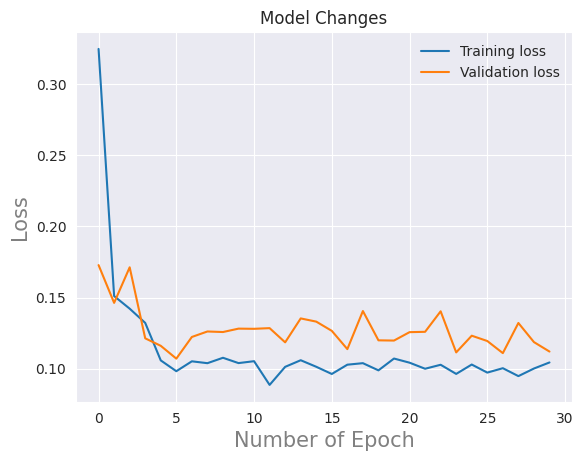

In [30]:
sns.set_style('darkgrid')
plt.plot(Train_loss, label='Training loss')
plt.plot(Valid_loss, label='Validation loss')
plt.legend(frameon=False)
plt.xlabel('Number of Epoch' , size = 15 , c = 'gray')
plt.ylabel('Loss' , size = 15 , c='gray')
plt.title('Model Changes')
plt.show()

Loading Model and put it on evaluation mode

In [31]:
Model.load_state_dict(torch.load('My_Model.pt'))
Model.eval()
Model.cuda()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), strid

Model Prediction

In [32]:
single_img, all_img = 0,0

for images, labels in test_dataloader:
    for i in range(len(labels)):
        images = images.cuda()
        labels = labels.cuda()
        img = images[i].view(1,3,150,150)
        
        with torch.no_grad():
            logps = Model(img)
            
        ps = torch.exp(logps)
        probab = list(ps.cpu()[0])
        pred_label = probab.index(max(probab))
        true_label = labels.cpu()[i]
        if(true_label == pred_label):
            single_img += 1
        all_img += 1
        
print(f'There are {all_img} in test')
print(f'The model accuracy is :{round((single_img/all_img)*100  , 2)}')

There are 231 in test
The model accuracy is :96.54


In [33]:
def pred_class(img):

    img_tens = test_transforms(img)
    img_im = img_tens.unsqueeze(0).cuda() 
    uinput = Variable(img_im)
    uinput = uinput.to(device)
    out = Model(uinput)
    index = out.data.cpu().numpy().argmax()    
    return index

Illustration of 50 pictures of prediction images

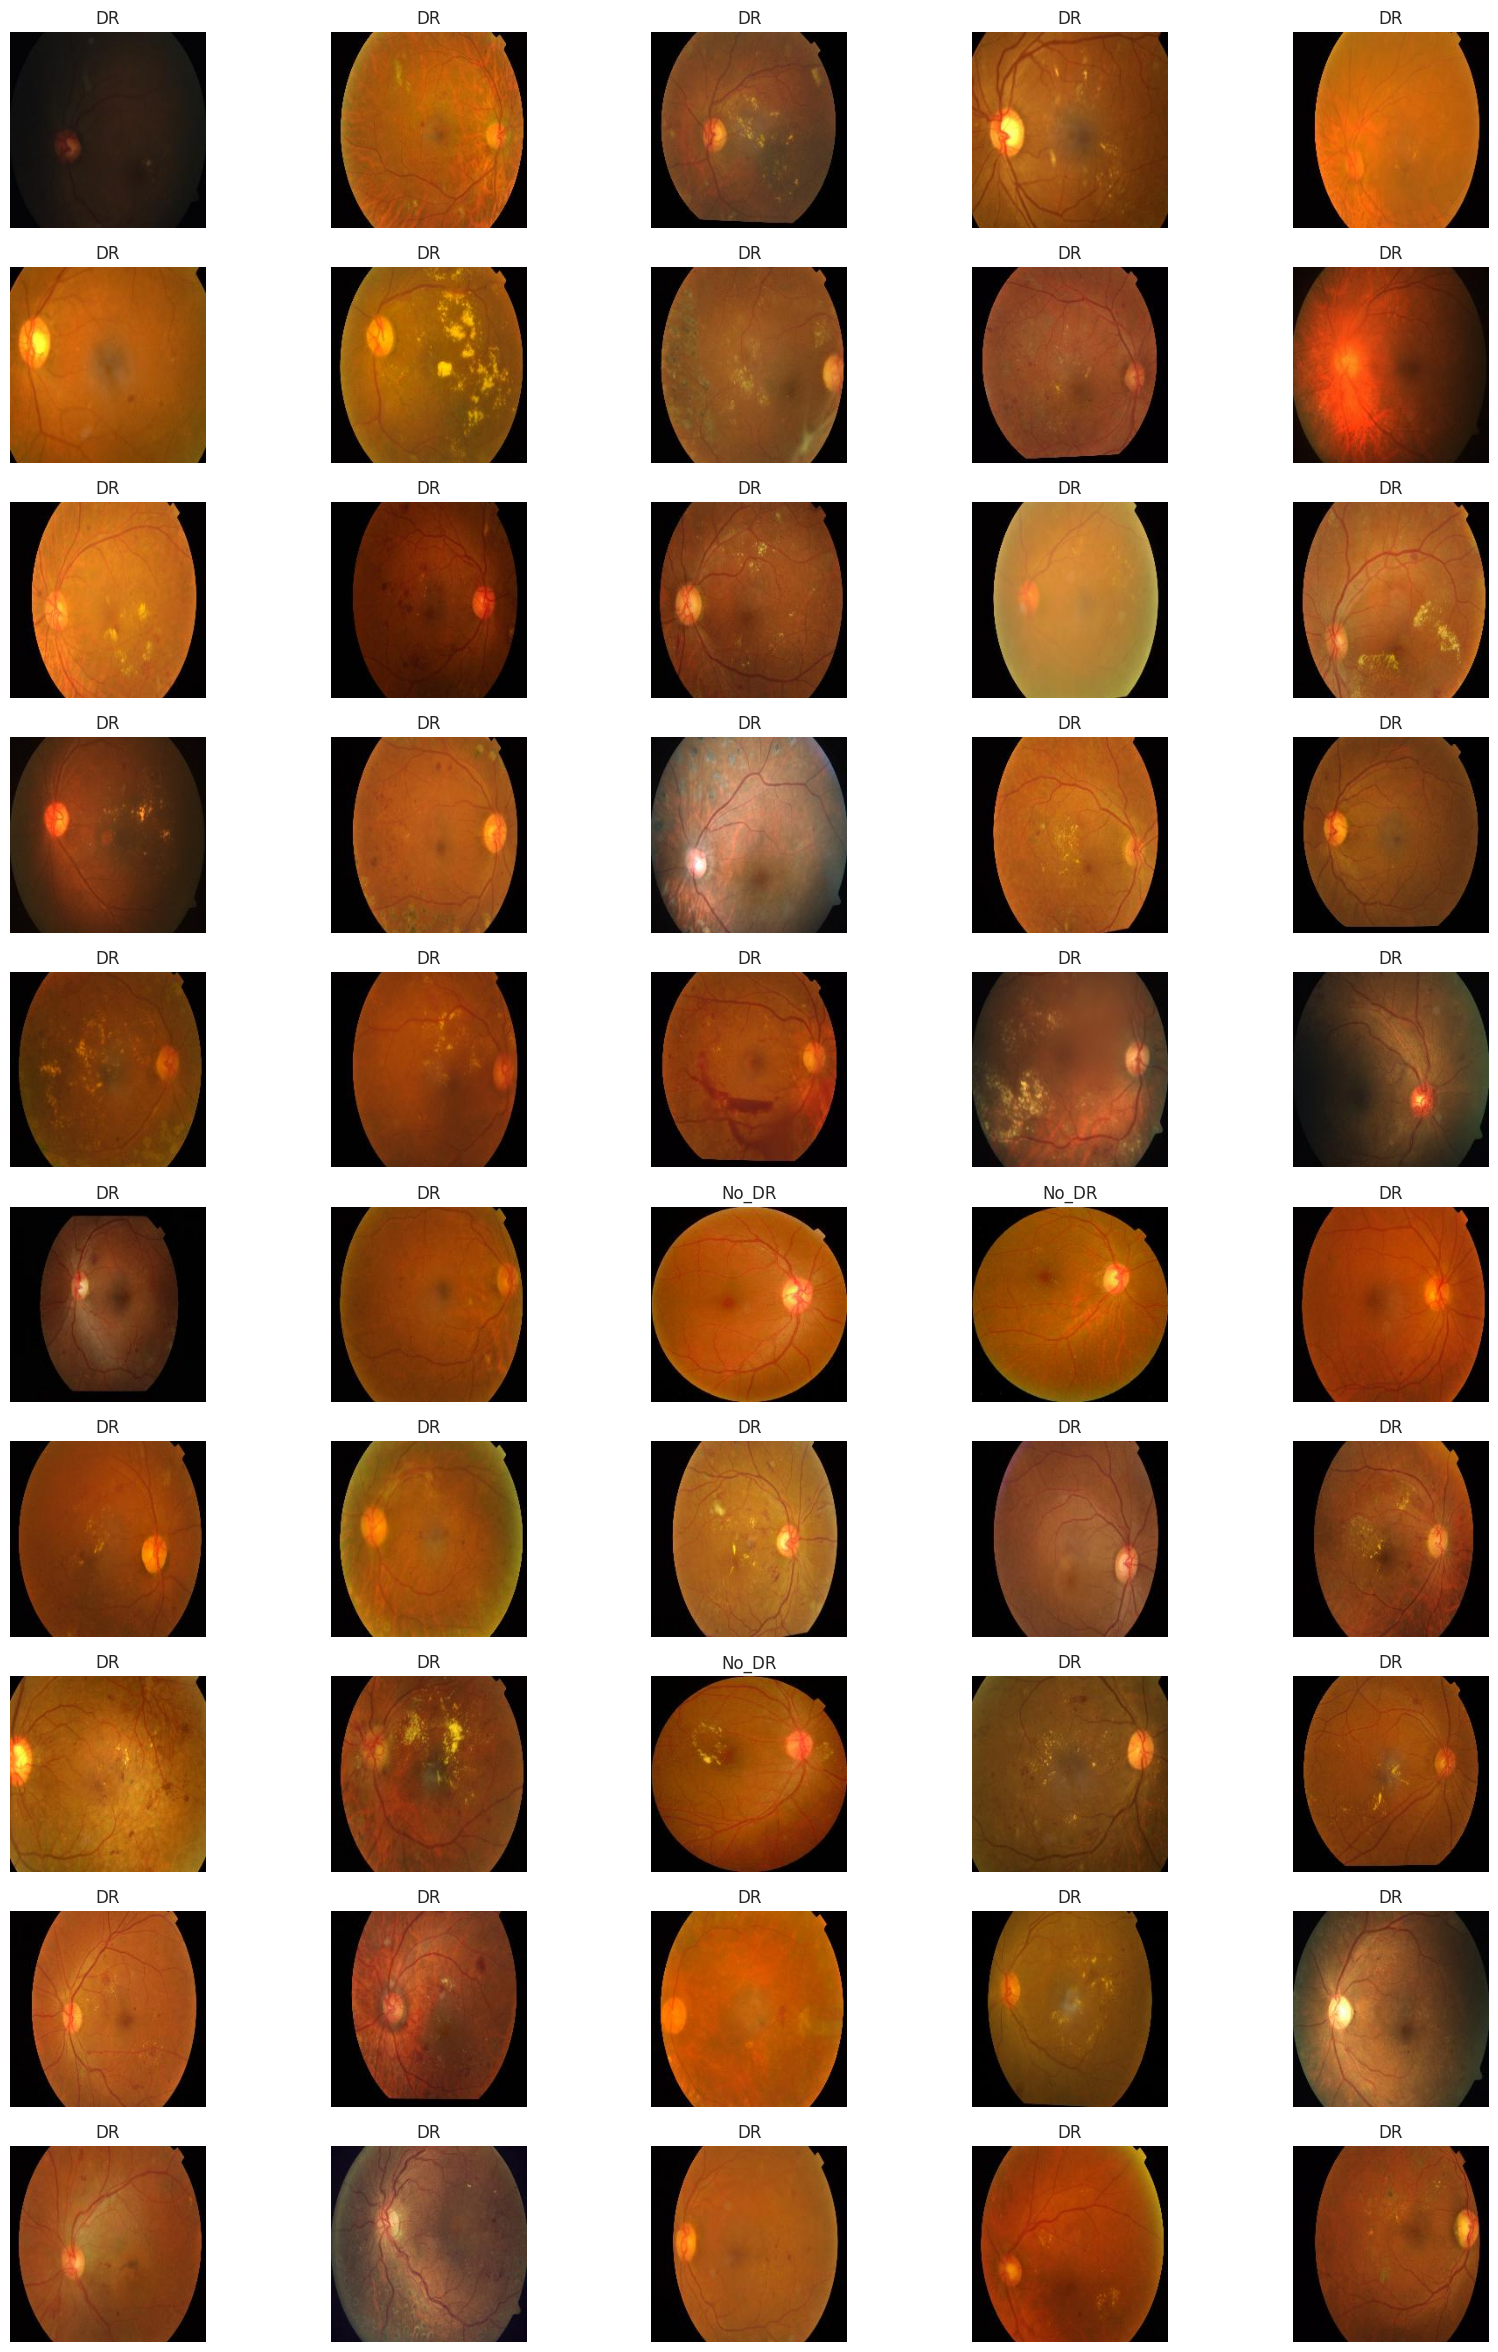

In [34]:
classes = {classes:values for classes , values in enumerate(sorted(train_data_custom.classes))}
Model.eval()

prediction_images = list(Path(test_dir).glob('*/*.jpg'))
plt.figure(figsize=(20,30))
for i, images in enumerate(prediction_images):
    if i > 49 :break
    img = Image.open(images)
    index = pred_class(img)
    plt.subplot(10,5,i+1)
    plt.title(classes[index])
    plt.axis('off')
    plt.imshow(img)

In [35]:
# Initialize lists to store true and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test images and make predictions
for img_path in prediction_images:
    img = Image.open(img_path)
    # Assuming pred_class returns the index of the predicted class
    predicted_index = pred_class(img)
    predicted_labels.append(predicted_index)
    
    # Extract true label from the file path
    true_class = img_path.parent.name
    true_index = train_data_custom.classes.index(true_class)
    true_labels.append(true_index)

In [36]:
conf_matrix = confusion_matrix(true_labels, predicted_labels)

In [37]:
fig = px.imshow(conf_matrix,
                labels=dict(x="Predicted Values", y="Actual Values", color="Values"),
                x=["Negative (0)", "Positive (1)"],
                y=["Negative (0)", "Positive (1)"],
                color_continuous_scale='Blues',  # Adjust color scale if needed
                width=600, height=600,
                text_auto=True,
                title="Confusion Matrix")

fig.update_xaxes(side="top")
fig.show()

In [38]:
pd.DataFrame(classification_report(true_labels, predicted_labels, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.981818,0.958678,0.969697,0.970248,0.969997
recall,0.955752,0.983051,0.969697,0.969402,0.969697
f1-score,0.968610,0.970711,0.969697,0.969661,0.969683
support,113.000000,118.000000,0.969697,231.000000,231.000000


In [39]:
FPR, TPR, thresholds = roc_curve(true_labels, predicted_labels)
roc_data = pd.DataFrame({
    'FPR': FPR,
    'TPR': TPR
})
fig = px.line(roc_data, x='FPR', y='TPR',
              title='ROC curve for MM 2024',
              labels={'FPR': 'False positive rate (1-Specificity)', 'TPR': 'True positive rate (Sensitivity)'},
              width=500, height=500)
fig.show()